### Step 0 : Init RoboFeeder Env
This cell sets up the environment for the RoboFeeder simulation by importing necessary modules and configuring the Python path.

In [ ]:
import os 
dir = os.getcwd()
if 'examples' in dir:
    os.chdir(os.getcwd().split('examples')[0])
else:
    print("please set the working directory to the root of the gym4ReaL repository")

# check if the current working directory is the root of the gym4ReaL repository
os.getcwd()

'/Users/giovannidispoto/Desktop/PhD/gym4real_rep/gym4ReaL'

### Step 1 : Import the environment
This cell imports the `os` module, checks if the current working directory is within the `gym4ReaL` repository, and sets the working directory to the root of the repository if necessary. It then prints the current working directory to confirm the setup.


In [2]:
import sys
sys.path.append(os.getcwd())  # <-- path to the *parent* of gym4real

import gym4real.envs.robofeeder.rf_picking_v0 as env
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env

### Step 2 : Test Simulator
import the simulator configuration file to pass the required parameters to run. 
Relevant parameters to adapt:

#### ObjectToPick
    NUMBER_OF_OBJECTS: 1           # (int) Number of objects to pick
    SHUFFLE_OBJECTS: True          # (bool) Shuffle object positions at reset
    OBJ_CORRECT_ORIENTATION: True  # (bool) Ensure objects have correct orientation

#### Simulator Setting
    IS_SIMULATION_REAL_TIME: False   # (bool) Run simulation in real time
    IS_SIMULATION_SHOWED: True       # (bool) Show simulation window
    IS_SIMULATION_RECORD: False      # (bool) Record simulation video
    RECORD_FOLDER : "." # (str) Folder to save recorded videos


In [3]:
import shutil

# Copy the default configuration file to a new editable file
default_config_file = os.getcwd() + "/gym4real/envs/robofeeder/configuration.yaml"
config_file = os.getcwd() + "/examples/robofeeder/notebooks/configuration_editable.yaml"
shutil.copy(default_config_file, config_file)

'/Users/giovannidispoto/Desktop/PhD/gym4real_rep/gym4ReaL/examples/robofeeder/notebooks/configuration_editable.yaml'


### Step 3 : Initialize the RoboFeeder Environment
This cell creates an instance of the RoboFeeder environment using the editable configuration file. The environment is now ready for interaction and simulation.


In [4]:
env = env.robotEnv(config_file)

/Users/giovannidispoto/miniforge3/envs/gym4real/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


### Step 4 : Define some utilities
This cell defines a helper function `printobs()` that visualizes the current observation from the RoboFeeder environment using matplotlib. The observation is reshaped according to the environment's crop dimensions and displayed as a grayscale image.


In [5]:
def printobs():
    plt.figure(figsize=(10, 5))
    plt.imshow(env.current_obs.reshape(env.CROP_DIM,env.CROP_DIM),cmap=plt.cm.gray)
    plt.show()

### Step 5 : Run Random Actions
This cell resets the environment, performs a random action, displays the observation, and prints the reward and done status. If the episode is done, it resets the environment again.


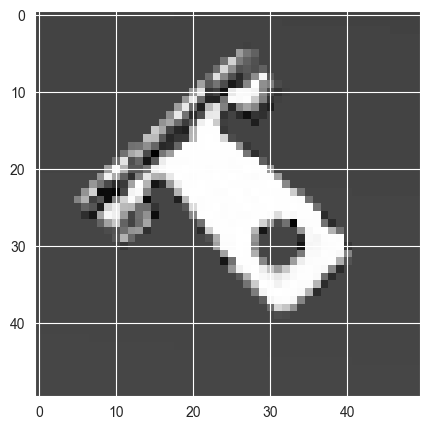

done: True
reward: -0.9884518691258336 


In [6]:
_,_ = env.reset()
# perform a random action
printobs()
action = env.action_space.sample()
obs,rew,done,_ ,_= env.step(action)

print("done:",done) 
print("reward:",rew,"\n")

if(done): env.reset()

# print the obs after the action



### Step 5 : Record Simulation Video
This cell checks if simulation recording is enabled in the simulator configuration. If enabled, it constructs the video path and displays the recorded simulation video in the notebook using an HTML video player.


In [7]:
import os
from IPython.display import HTML

if env.simulator.configs["IS_SIMULATION_RECORD"]:
    # Construct video path
    video_name = f"simulated_pick_{env.simulator.counter}.mp4"
    video_path = os.path.join(env.simulator.configs["RECORD_FOLDER"], video_name)
    
    display(HTML(f"""
    <div style="text-align: center;">
        <video width="300" height="300" controls>
            <source src="{video_path}" type="video/mp4">
            Your browser does not support the video tag.
        </video>
    </div>
    """))